In [18]:
# Install required libraries
!pip install yfinance requests bs4 plotly
# Import libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Import required libraries for plotting
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [24]:
# Question 1: Use yfinance to Extract Tesla Stock Data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print("Tesla Stock Data - First 5 Rows:")
tesla_data.head()

Tesla Stock Data - First 5 Rows:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [20]:
# Question 2: Use Webscraping to Extract Tesla Revenue Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Make HTTP request
html_data = requests.get(url).text

# Parse HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Initialize empty lists to store data
tesla_revenue_data = []

# Extract data from table
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    if col != []:
        date = col[0].text.strip()
        revenue = col[1].text.strip()
        
        # Clean the data and add to list
        if revenue != "":
            tesla_revenue_data.append({"Date": date, "Revenue": revenue})

# Create DataFrame from list
tesla_revenue = pd.DataFrame(tesla_revenue_data)

# Remove $ and commas from revenue, convert to numeric
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# Remove empty strings and convert to float
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display last 5 rows
print("Tesla Revenue Data - Last 5 Rows:")
tesla_revenue.tail()



Tesla Revenue Data - Last 5 Rows:


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [21]:
# Question 3: Use yfinance to Extract GameStop Stock Data
gme = yf.Ticker("GME")

# Extract GameStop stock data
gme_data = gme.history(period="max")

# Reset the index to make Date a column
gme_data.reset_index(inplace=True)

# Display first 5 rows
print("GameStop Stock Data - First 5 Rows:")
gme_data.head()


GameStop Stock Data - First 5 Rows:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [22]:
# Question 4: Use Webscraping to Extract GameStop Revenue Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Make HTTP request
html_data = requests.get(url).text

# Parse HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Initialize empty lists to store data
gme_revenue_data = []

# Extract data from table
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    if col != []:
        date = col[0].text.strip()
        revenue = col[1].text.strip()
        
        # Clean the data and add to list
        if revenue != "":
            gme_revenue_data.append({"Date": date, "Revenue": revenue})

# Create DataFrame from list
gme_revenue = pd.DataFrame(gme_revenue_data)

# Remove $ and commas from revenue
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# Remove empty strings
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Display last 5 rows
print("GameStop Revenue Data - Last 5 Rows:")
gme_revenue.tail()


GameStop Revenue Data - Last 5 Rows:


,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [14]:
# Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    try:
        fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                            subplot_titles=("Historical Share Price", "Historical Revenue"), 
                            vertical_spacing = .3)
        
        # Convert Date columns to datetime if they aren't already
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
        revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
        
        # Filter data up to specific dates
        stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
        revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
        
        # Add stock price trace
        fig.add_trace(go.Scatter(x=stock_data_specific.Date, 
                                 y=stock_data_specific.Close.astype("float"), 
                                 name="Share Price"), row=1, col=1)
        
        # Add revenue trace - convert to numeric safely
        revenue_numeric = pd.to_numeric(revenue_data_specific.Revenue, errors='coerce')
        fig.add_trace(go.Scatter(x=revenue_data_specific.Date, 
                                 y=revenue_numeric, 
                                 name="Revenue"), row=2, col=1)
        
        # Update layout and axes
        fig.update_xaxes(title_text="Date", row=1, col=1)
        fig.update_xaxes(title_text="Date", row=2, col=1)
        fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
        fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
        fig.update_layout(showlegend=False,
                          height=900,
                          title=stock,
                          xaxis_rangeslider_visible=True)
        fig.show()
        
    except Exception as e:
        print(f"Error creating graph: {e}")
        print("Please check your data format and try again.")


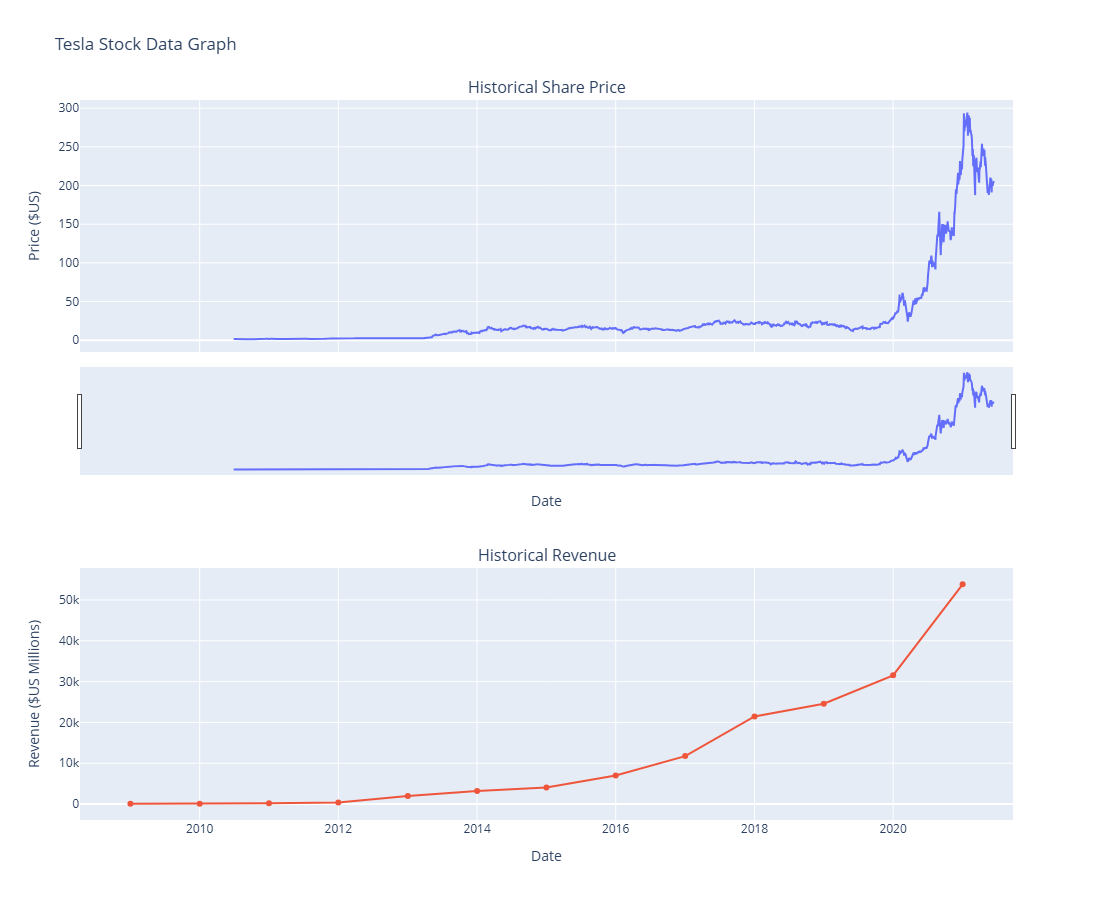

In [25]:
# Question 5: Plot Tesla Stock Graph
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data Graph')


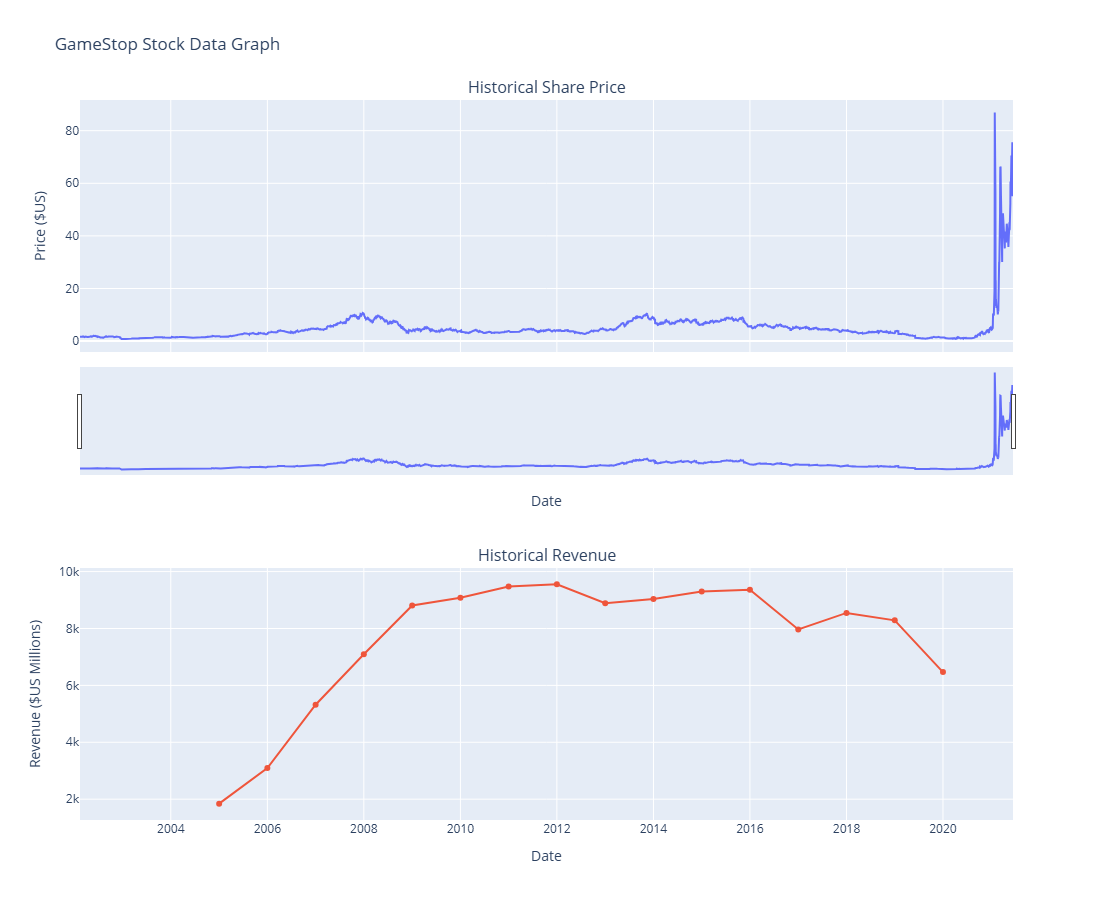

In [16]:
# Question 6: Plot GameStop Stock Graph  
make_graph(gme_data, gme_revenue, 'GameStop Stock Data Graph')
